In [1]:
from scipy import io
import numpy as np
import pandas as pd
import seaborn as sns

from os import listdir
from os.path import isfile, join
from datetime import datetime

from classes.matlab_reader import matlab_reader
from classes.grid_funcs import map_grid,dataset,data_wizard


grid = map_grid(grid_size=125)
wizard = data_wizard()


In [2]:

def extract_date(filename):
    date_string = filename.split("_")[0]
    date_obj = datetime.strptime(date_string, '%Y%m%d')
    return date_obj.date()



Start Date:  2018-01-01 
End Date:  2018-12-31 
Days count:  364


In [17]:
# hold array of mean value over seleted value
means = []

# specify areas we care about (all latitudes abobe 60 degrees (north hemisphere, close to poles))
select_area_indexer = grid.select_area_indexer(
    min_lat= 60,
    max_lat= 90,
    min_lon= -90,
    max_lon= 90)

for year in [2018,2019,2020,2021]:

    FILES = np.sort(listdir(f'AIRS_125KM_{year}/'))
    FILES_DATE = [extract_date(file) for file in FILES]
    
    print("Start Date: ",min(FILES_DATE),"\nEnd Date: ",max(FILES_DATE),"\nDays count: ",len(FILES_DATE))

    for file in FILES:
        date = extract_date(file)
        try:
                matlab = matlab_reader(f'AIRS_125KM_{year}/' + file)
                full_data = matlab.select(hemisphere= 'nh', data_field='bg', daytime='night', altitude=2)  
                    
                selected_data = wizard.data_filtering(select_area_indexer = select_area_indexer ,data = full_data)
                mean = dataset(selected_data).mean
                means.append([mean,date,year])
        except:
            pass

241.8330535888672
246.7177276611328
250.93060302734375
240.87498474121094
246.50393676757812
248.77003479003906
252.6002960205078
264.3074035644531
262.4505615234375
261.1953430175781
258.9703674316406
266.244873046875
263.4234924316406
261.0482482910156
269.9093933105469
272.6082763671875
269.8930358886719
273.8340759277344
273.2641906738281
278.0784912109375
267.5574951171875
272.0027770996094
271.9978942871094
260.2217712402344
253.1038818359375
259.9464111328125
261.9302978515625
261.6185607910156
274.17694091796875
282.153564453125
270.37860107421875
272.93798828125
273.067138671875
275.82666015625
274.6947021484375
271.6777038574219
287.1321716308594
278.3579406738281
283.07403564453125
262.7540588378906
265.25732421875
275.9801330566406
278.57208251953125
272.0602111816406
294.8682556152344
277.25335693359375
254.76718139648438
243.91238403320312
243.96859741210938
243.90310668945312
245.92147827148438
238.89251708984375
240.56939697265625
239.6676788330078
240.65907287597656
24

<Axes: xlabel='date', ylabel='Mean Daily Temperature'>

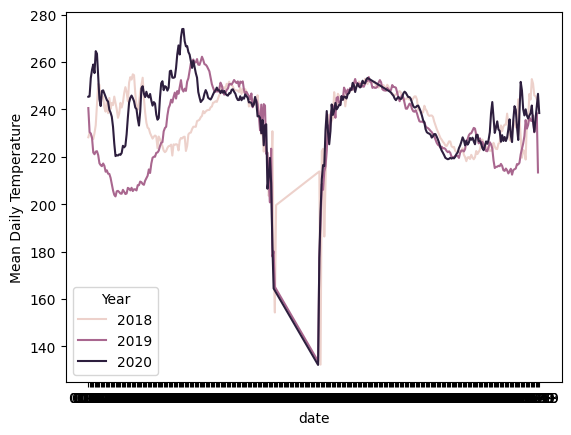

In [82]:
import matplotlib.pyplot as plt

df = pd.DataFrame(means, columns = ['Mean Daily Temperature','Datetime','Year'])
df['date'] = df['Datetime'].apply(lambda x : x.strftime('%m-%d'))

sns.lineplot(x='date', y='Mean Daily Temperature', hue='Year', data=df)


<Axes: xlabel='date', ylabel='Mean Daily Temperature'>

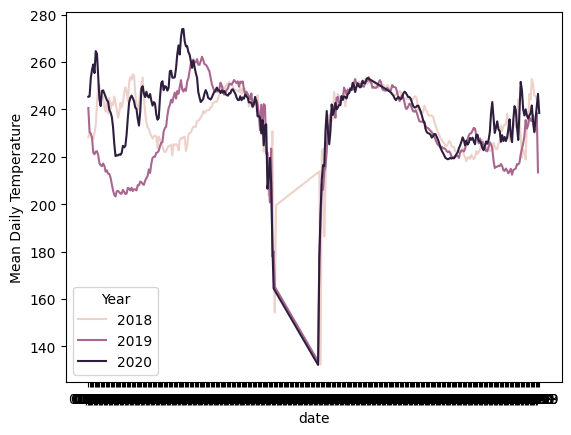

In [53]:


sns.lineplot(x='date', y='Mean Daily Temperature', hue='Year', data=df)

In [45]:
df['Datetime'].iloc[0].day

1

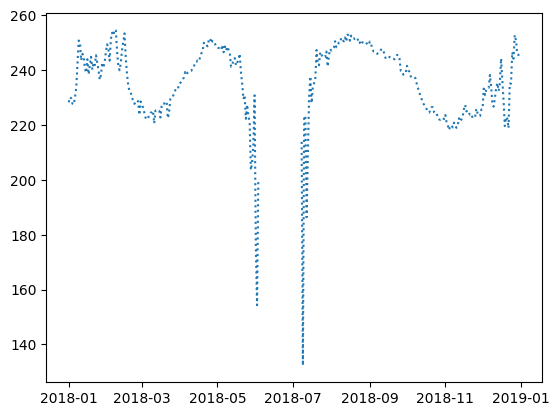

In [8]:
import matplotlib.pyplot as plt
import numpy as np
y = means
x = FILES_DATE[:len(means)]
plt.plot(x,y, linestyle = 'dotted')
plt.show()

In [5]:
np.max(selected_data)

nan

In [6]:
array = np.array([2,4,4,np.nan])